# IMAGE CLASSIFICATION OF CATS AND DOGS USING CNN

# Abstract

Recognizing cats and dogs from images is a challenging competition which asks users to identify cat and dog photographs with large variation in size and noise. Humans can accomplish it quickly and accurately, however, to train an artificial intelligent system coupling this task is non-trivial. In this project, we use convolutional neural network (CNN) which can capture and are able to learn relevant features from an image at different levels similar to a human brain. This is feature learning. CNNs are very good feature extractors. We are teaching a classifier to distinguish cat images from dog ones. The learning dataset consists of a dataset consisting of 25000 pets (12500 cats, and 12500 dogs).


Given a set of labeled images of cats and dogs, we have designed a deep learning algorithm to learn which is what i.e., either a cat or a dog and later classify whether a set of new images are either a cat or a dog based on the prediction score i.e., scores close to 1 being predicted as a dog and scores close to 0 is predicted as a cat. 


# STEP:0  Import all libraries

In [3]:
#BASIC LIBRARIES USED
import numpy as np # FOR ARRAYS
import pandas as pd 
import cv2  # RESIZING IMAGES 
import os, random
import re
from glob import glob
from random import shuffle 
from tqdm import tqdm   
import pickle
import warnings
import PIL
from PIL import Image
from collections import Counter
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.metrics import accuracy_score


#PLOTTING RELATED LIBRARIES
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from ipywidgets import FloatProgress
from IPython.display import display
from PIL import Image, ImageOps
import seaborn as sns
from matplotlib import ticker
%matplotlib inline 

#tflearn libraries used
import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from tflearn.layers.conv import conv_2d, max_pool_2d

#KERAS MODELS USED 
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils

warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

# Step 1: Preprocessing the data

We can't exactly feed raw images to our neural network. First, we need all of the images to be the same size and then grayscale them. Also, the labels of "cat" and "dog" are not useful, we want them to be represented as arrays. Even though it is said that TensorFlow Fold makes it easy to implement deep-learning models that operate over data of varying size and structure, we still resize it to one same size to stay on a safer side.
To begin with, we convert the images and labels to array information that we can pass through our network. To do this, we'll need a helper function to convert the image name to an array.
Our images are labeled like "cat.1" or "dog.3" and so on, so we can just split out the dog/cat, and then convert to an array. We then fully process the training images and their labels into arrays.
So, at the end of this step, what we have is an array data of the image and its label, which is shuffled and saved which modifies a variable in place, so there's no need to re-define. With this function, we will both save, and return the array data. This way, if we just change the neural network's structure, and not something with the images, like image size, etc., then we can just load the array file and save some processing time. Following which we can run the training. 


#  DATA ANALYSIS

#  LET US CONSIDER ONE IMAGE AND ANALYZE THE IMAGE IN DETAIL

In [5]:
cat_image = Image.open("train/cat.10.jpg")
dog_image = Image.open("train/dog.10.jpg")

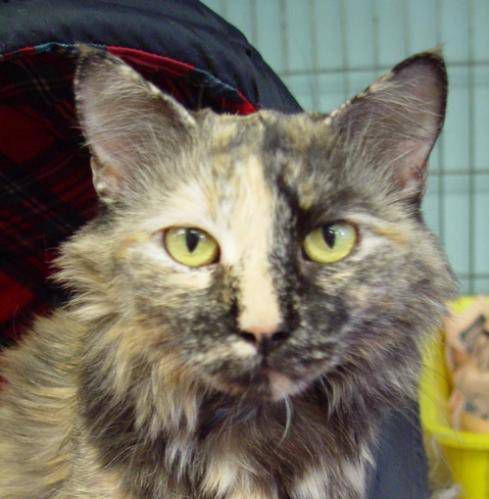

In [6]:
cat_image

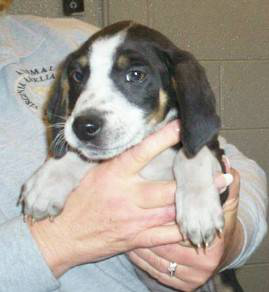

In [7]:
dog_image

In [8]:
cat_image.size
cat_arraysize  = np.array(cat_image.getdata())

In [9]:
cat_arraysize.shape

(244011, 3)

In [10]:
dog_image.size
dog_arraysize  = np.array(dog_image.getdata())

In [11]:
dog_arraysize.shape

(78548, 3)

# LET US CONSIDER ALL IMAGES AND ANALYZE THE IMAGES IN DETAIL

In [42]:
TRAIN_FOLDER = 'train/'
TEST_FOLDER = 'test1/'
ROWS = 64
COLS = 64
CHANNELS = 3
IMG_SIZE = 50
LR = 1e-3
MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '2conv-basic') 

#TO READ ALL TRAINING AND TESTING IMAGES IN GENERAL 
training_images = [TRAIN_FOLDER+i for i in os.listdir(TRAIN_FOLDER)] 
dogs_trainfiles =   [TRAIN_FOLDER+i for i in os.listdir(TRAIN_FOLDER) if 'dog' in i]
cats_trainfiles =   [TRAIN_FOLDER+i for i in os.listdir(TRAIN_FOLDER) if 'cat' in i]
testing_images =  [TEST_FOLDER+i for i in os.listdir(TEST_FOLDER)]

#function how to sort the image values
def natural_key(string_):
    return [int(s) if s.isdigit() else s for s in re.split(r'(\d+)', string_)]

#TO READ ALL TRAINING AND TESTING IMAGES IN SORTED MANNER
train_cats = sorted(glob(os.path.join(TRAIN_FOLDER, 'cat*.jpg')), key=natural_key)
train_dogs = sorted(glob(os.path.join(TRAIN_FOLDER, 'dog*.jpg')), key=natural_key)
train_all = train_cats + train_dogs
test_all = sorted(glob(os.path.join(TEST_FOLDER, '*.jpg')), key=natural_key)

#function to read all image from the folder
def reading_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) 
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

#function for preparing data
def preparing_data(images):
    count = len(images)
    data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = reading_image(image_file)
        data[i] = image.T
        if i%250 == 0: print('Processed {} of {}'.format(i, count))
    return data

train = preparing_data(training_images)
test = preparing_data(testing_images)

Processed 0 of 25000
Processed 250 of 25000
Processed 500 of 25000
Processed 750 of 25000
Processed 1000 of 25000
Processed 1250 of 25000
Processed 1500 of 25000
Processed 1750 of 25000
Processed 2000 of 25000
Processed 2250 of 25000
Processed 2500 of 25000
Processed 2750 of 25000
Processed 3000 of 25000
Processed 3250 of 25000
Processed 3500 of 25000
Processed 3750 of 25000
Processed 4000 of 25000
Processed 4250 of 25000
Processed 4500 of 25000
Processed 4750 of 25000
Processed 5000 of 25000
Processed 5250 of 25000
Processed 5500 of 25000
Processed 5750 of 25000
Processed 6000 of 25000
Processed 6250 of 25000
Processed 6500 of 25000
Processed 6750 of 25000
Processed 7000 of 25000
Processed 7250 of 25000
Processed 7500 of 25000
Processed 7750 of 25000
Processed 8000 of 25000
Processed 8250 of 25000
Processed 8500 of 25000
Processed 8750 of 25000
Processed 9000 of 25000
Processed 9250 of 25000
Processed 9500 of 25000
Processed 9750 of 25000
Processed 10000 of 25000
Processed 10250 of 25

In [43]:
#Resizing and processing the training images and their labels into arrays
def training_data():
    trainarray_data = []
    for img in tqdm(os.listdir(TRAIN_FOLDER)):
        label = image_array(img)
        path = os.path.join(TRAIN_FOLDER,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        trainarray_data.append([np.array(img),np.array(label)])
    shuffle(trainarray_data)
    np.save('trainingdata.npy', trainarray_data)
    return trainarray_data

def testing_data():
    testarray_data = []
    for img in tqdm(os.listdir(TEST_FOLDER)):
        path = os.path.join(TEST_FOLDER,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testarray_data.append([np.array(img), img_num])
    shuffle(testarray_data)
    np.save('testingdata.npy', testing_data)
    return testarray_data

# TO DISPLAY THE CATS AND DOGS RATIO IN THE DATASET

Text(0.5,1,'Number of Cats and Dogs')

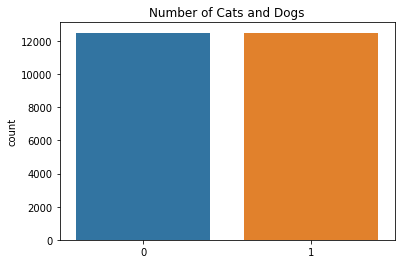

In [44]:
labels = []
for i in training_images:
    if 'dog' in i:
        labels.append(1)
    else:
        labels.append(0)
sns.countplot(labels)
plt.title('Number of Cats and Dogs')

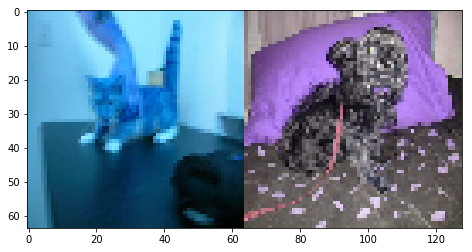

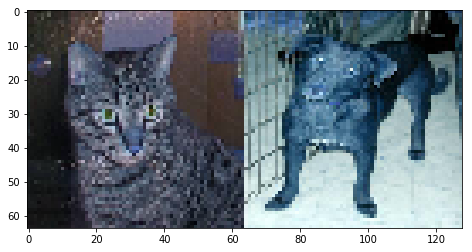

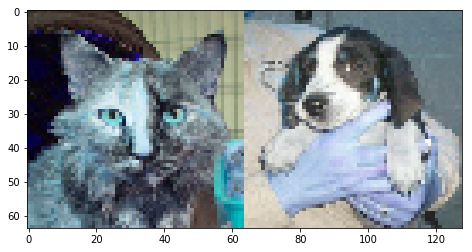

In [45]:
def Visualize_cats_and_dogs(idx):
    vis_cat = reading_image(cats_trainfiles[idx])
    vis_dog = reading_image(dogs_trainfiles[idx])
    pair = np.concatenate((vis_cat, vis_dog), axis=1)
    plt.figure(figsize=(8,4))
    plt.imshow(pair)
    plt.show()    
for idx in range(0,3):
    Visualize_cats_and_dogs(idx)

# TO CALCULATE THE MEAN PIXEL VALUES 

In [46]:
#convert the images and labels to one array
def image_array(img):
    label = img.split('.')[-3]
    if label == 'cat': return [1,0]
    elif label == 'dog': return [0,1]

Text(0.5,1,'Average Dog pixel values')

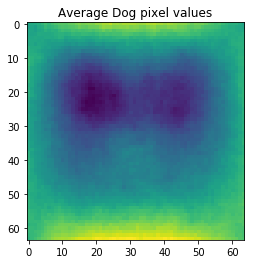

In [47]:
dog_average = np.array([vis_dog[0].T for i, vis_dog in enumerate(train) if labels[i]==1]).mean(axis=0)
plt.imshow(dog_average)
plt.title('Average Dog pixel values')

Text(0.5,1,'Average Cat pixel values')

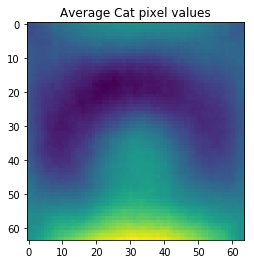

In [48]:
cat_average = np.array([vis_cat[0].T for i, vis_cat in enumerate(train) if labels[i]==0]).mean(axis=0)
plt.imshow(cat_average)
plt.title('Average Cat pixel values')

# ASPECT RATIO CALCULATION 

In [49]:
path_dimensions = 'sizes.pkl'
if os.path.isfile(path_dimensions):
    with open(path_dimensions, 'rb') as f:
        df_dimensions = pickle.load(f)
else:
    progress = FloatProgress(min=0, max=len(train_all), bar_style = '', description='Accumulating sizes')
    display(progress)
    aspr_all = []
    cols_all = []
    rows_all = []
    for idx, trn in enumerate(train_all):
        im = Image.open(trn)
        cols, rows = im.size
        cols_all.append(cols)
        rows_all.append(rows)
        aspr_all.append(cols / rows)
        progress.value = idx
        
    df_dimensions = pd.DataFrame.from_dict({'Path':train_all, 'Cols':cols_all, 'Rows':rows_all, 'AspRat':aspr_all})
    df_dimensions = df_dimensions[['Path', 'Cols', 'Rows', 'AspRat']]
    
     # Save it
    with open(path_dimensions, 'wb') as f:
        pickle.dump(df_dimensions, f)
    print('Dimensions data {}'.format(path_dimensions))

In [50]:
df_dimensions.describe()

,Cols,Rows,AspRat
count,25000.00000,25000.000000,25000.000000
mean,404.09904,360.478080,1.157199
std,109.03793,97.019959,0.291914
min,42.00000,32.000000,0.306613
25%,323.00000,301.000000,0.929851
50%,447.00000,374.000000,1.270944
75%,499.00000,421.000000,1.336898
max,1050.00000,768.000000,5.909091


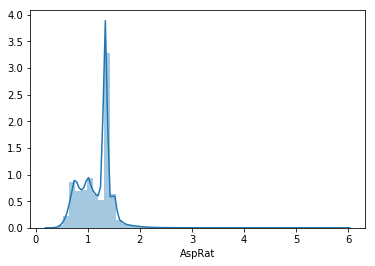

In [51]:
sns.distplot(df_dimensions['AspRat']);

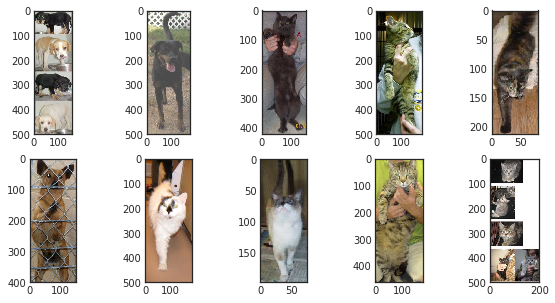

In [52]:
df_byaspectratio = df_dimensions.sort_values('AspRat')
paths = df_byaspectratio.iloc[:10]['Path'].values
with sns.axes_style("white"):
    fig = plt.figure(figsize=(10,5))
    for col, path in enumerate(paths):
        plt.subplot(2, 5, col + 1)
        img = mpimg.imread(path)
        plt.imshow(img)

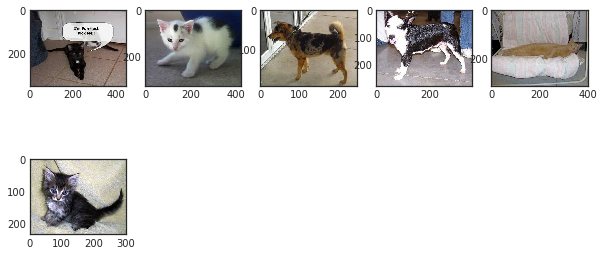

In [53]:
#Median aspect ratios
start = 12500 - 5
paths = df_byaspectratio.iloc[start:start + 6]['Path']
with sns.axes_style("white"):
    fig = plt.figure(figsize=(10,5))
    for col, path in enumerate(paths):
        plt.subplot(2, 5, col + 1)
        img = mpimg.imread(path)
        plt.imshow(img)

# NEURAL NETWORK MODEL - Model the data using CNN

STEP A)  INITIALLY WE STARTED BY USING 2 LAYERED CONVOLUTIONAL NEURAL NETWORK MODEL WITH A FULLY CONNECTED LAYER AND THE OUTPUT LAYER.

In [54]:
train_data = training_data()

100%|████████████████████████████████████████████████████████████████████████████| 25000/25000 [00:27<00:00, 894.13it/s]


# Why did we choose ReLU?
The Rectified Linear Unit (ReLU) is the most commonly used activation function in deep learning models. The function returns 0 if it receives any negative input, but for any positive value x it returns that value back. So it can be written as 
f(x)=max(0,x)

It's surprising that such a simple function (and one composed of two linear pieces) can allow your model to account for non-linearities and interactions so well. But the ReLU function works great in most applications, and it is very widely used as a result.

Unfortunately, ReLU units can be fragile during training and can "die". For example, a large gradient flowing through a ReLU neuron could cause the weights to update in such a way that the neuron will never activate on any data point again. If this happens, then the gradient flowing through the unit will forever be zero from that point on. That is, the ReLU units can irreversibly die during training since they can get knocked off the data manifold. 


In [64]:
import tensorflow as tf
tf.reset_default_graph()

In [65]:
convnetwork_layer = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnetwork_layer = conv_2d(convnetwork_layer, 32, 5, activation='relu')
convnetwork_layer = max_pool_2d(convnetwork_layer, 5)

convnetwork_layer = conv_2d(convnetwork_layer, 64, 5, activation='relu')
convnetwork_layer = max_pool_2d(convnetwork_layer, 5)

convnetwork_layer = fully_connected(convnetwork_layer, 1024, activation='relu')
convnetwork_layer = dropout(convnetwork_layer, 0.8)

convnetwork_layer = fully_connected(convnetwork_layer, 2, activation='softmax')
convnetwork_layer = regression(convnetwork_layer, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnetwork_layer, tensorboard_dir='log')

#saving model 
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

# Why Softmax?

The Softmax function squashes the outputs of each unit to be between 0 and 1. But it also divides each output such that the total sum of the outputs is equal to 1. The output of the softmax function is equivalent to a categorical probability distribution, it tells you the probability that any of the classes are true.
Mathematically the softmax function is shown below, where z is a vector of the inputs to the output layer (if you have 10 output units, then there are 10 elements in z). And again, j indexes the output units, so j = 1, 2, ..., K.

# Training and Testing data:

- Training data and Testing data are both labeled datasets.
- we use the training data to fit the neural network
- we use the testing data to validate the results and obtain the accuracy of the model.

In [66]:
train_label = train_data[:-500]
test_label = train_data[-500:]

In [67]:
X = np.array([i[0] for i in train_label]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train_label]

test_x = np.array([i[0] for i in test_label]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test_label]

# train the network for 3 epochs
model.fit({'input': X}, {'targets': Y}, n_epoch=3, validation_set=({'input': test_x}, {'targets': test_y}), snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 1148  | total loss: 11.47864 | time: 50.464s
| Adam | epoch: 003 | loss: 11.47864 - acc: 0.5015 -- iter: 24448/24500
Training Step: 1149  | total loss: 11.37413 | time: 51.606s
| Adam | epoch: 003 | loss: 11.37413 - acc: 0.5060 | val_loss: 11.83529 - val_acc: 0.4860 -- iter: 24500/24500
--


# Why did Adam Optimizer win over the other optimizers?

The Adam optimization algorithm is an extension to stochastic gradient descent that has recently seen broader adoption for deep learning applications in computer vision and natural language processing.
There are several benefits of using Adam on non-convex optimization problems. Adam optimization is straightforward to implement, computationally efficient, it has low memory requirements and is invariant to diagonal rescale of the gradients. Adam is well suited for problems that are large in terms of data and parameters. It is appropriate for non-stationary objectives and problems with very noisy and sparse gradients.
Adam is different to classical stochastic gradient descent. Stochastic gradient descent maintains a single learning rate (termed alpha) for all weight updates and the learning rate does not change during training. A learning rate is maintained for each network weight (parameter) and separately adapted as learning unfolds. 
Adam is combined form of the advantages of two other extensions of stochastic gradient descent i.e., Adaptive Gradient Algorithm (AdaGrad) and Root Mean Square Propagation (RMSProp).
We can say that Adam realizes the benefits of both AdaGrad and RMSProp.
Instead of adapting the parameter learning rates based on the average first moment (the mean) as in RMSProp, Adam also makes use of the average of the second moments of the gradients (the uncentered variance).
Adam is a popular algorithm in the field of deep learning because it achieves good results fast which is why we use Adam in our classifier.


STEP B) NOW WE TRAIN WITH HUGE NETWORK COMPARED TO 2 LAYER NETWORK.

In [73]:
import tensorflow as tf
tf.reset_default_graph()

In [74]:
convnetwork_layer = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnetwork_layer = conv_2d(convnetwork_layer, 32, 5, activation='relu')
convnetwork_layer = max_pool_2d(convnetwork_layer, 5)

convnetwork_layer = conv_2d(convnetwork_layer, 64, 5, activation='relu')
convnetwork_layer = max_pool_2d(convnetwork_layer, 5)

convnetwork_layer = conv_2d(convnetwork_layer, 128, 5, activation='relu')
convnetwork_layer = max_pool_2d(convnetwork_layer, 5)

convnetwork_layer = conv_2d(convnetwork_layer, 64, 5, activation='relu')
convnetwork_layer = max_pool_2d(convnetwork_layer, 5)

convnetwork_layer = conv_2d(convnetwork_layer, 32, 5, activation='relu')
convnetwork_layer = max_pool_2d(convnetwork_layer, 5)

convnetwork_layer = fully_connected(convnetwork_layer, 1024, activation='relu')
convnetwork_layer = dropout(convnetwork_layer, 0.8)

convnetwork_layer = fully_connected(convnetwork_layer, 2, activation='softmax')
convnetwork_layer = regression(convnetwork_layer, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnetwork_layer, tensorboard_dir='log')

if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
train = train_data[:-500]
test = train_data[-500:]

X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]

model.fit({'input': X}, {'targets': Y}, n_epoch=3, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 1148  | total loss: 0.51450 | time: 51.905s
| Adam | epoch: 003 | loss: 0.51450 - acc: 0.7462 -- iter: 24448/24500
Training Step: 1149  | total loss: 0.50388 | time: 53.068s
| Adam | epoch: 003 | loss: 0.50388 - acc: 0.7575 | val_loss: 0.51457 - val_acc: 0.7360 -- iter: 24500/24500
--


STEP C) NOW WE CONTINUE TRAINING THE MODEL TO ACHIEVE BETTER ACCURACY WITH MORE NUMBER OF EPOCHS USING THE ABOVE NETWORK

In [80]:
import tensorflow as tf
tf.reset_default_graph()

In [81]:
convnetwork_layer = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnetwork_layer = conv_2d(convnetwork_layer, 32, 5, activation='relu')
convnetwork_layer = max_pool_2d(convnetwork_layer, 5)

convnetwork_layer = conv_2d(convnetwork_layer, 64, 5, activation='relu')
convnetwork_layer = max_pool_2d(convnetwork_layer, 5)

convnetwork_layer = conv_2d(convnetwork_layer, 128, 5, activation='relu')
convnetwork_layer = max_pool_2d(convnetwork_layer, 5)

convnetwork_layer = conv_2d(convnetwork_layer, 64, 5, activation='relu')
convnetwork_layer= max_pool_2d(convnetwork_layer, 5)

convnetwork_layer= conv_2d(convnetwork_layer, 32, 5, activation='relu')
convnetwork_layer= max_pool_2d(convnetwork_layer, 5)

convnetwork_layer = fully_connected(convnetwork_layer, 1024, activation='relu')
convnetwork_layer = dropout(convnetwork_layer, 0.8)

convnetwork_layer = fully_connected(convnetwork_layer, 2, activation='softmax')
convnetwork_layer = regression(convnetwork_layer, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnetwork_layer, tensorboard_dir='log')

if os.path.exists('C:/Users/vinay/Desktop/DEEP_LEARNING_PROJECT/FINAL_OUTPUT/{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)

train = train_data[:-500]
test = train_data[-500:]

X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]

model.fit({'input': X}, {'targets': Y}, n_epoch=15, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

model.save(MODEL_NAME)

Training Step: 5744  | total loss: 0.30066 | time: 53.027s
| Adam | epoch: 015 | loss: 0.30066 - acc: 0.8759 -- iter: 24448/24500
Training Step: 5745  | total loss: 0.29999 | time: 54.171s
| Adam | epoch: 015 | loss: 0.29999 - acc: 0.8774 | val_loss: 0.56371 - val_acc: 0.7700 -- iter: 24500/24500
--
INFO:tensorflow:C:\Users\vinay\Desktop\DEEP_LEARNING_PROJECT\FINAL_OUTPUT\dogsvscats-0.001-2conv-basic.model is not in all_model_checkpoint_paths. Manually adding it.


# Printing the output data to file

In [29]:
import matplotlib.pyplot as plt

test_data = testing_data()
test_data = np.load('testingdata.npy')
fig=plt.figure()

for num,data in enumerate(test_data[:12]):
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    #model_out = model.predict([data])[0]
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label='Dog'
    else: str_label='Cat'
        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

100%|████████████████████████████████████████████████████████████████████████████| 12500/12500 [00:13<00:00, 928.27it/s]


In [30]:
with open('OUTPUTDATA.csv','w') as f:
    f.write('id,label\n')
            
with open('OUTPUTDATA.csv','a') as f:
    for data in tqdm(test_data):
        img_num = data[1]
        img_data = data[0]
        orig = img_data
        data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
        model_out = model.predict([data])[0]
        f.write('{},{}\n'.format(img_num,model_out[1]))

100%|████████████████████████████████████████████████████████████████████████████| 12500/12500 [00:22<00:00, 557.22it/s]


# RESULT
Initially we started off by training using only 2 connected layers wherein which we achieved an accuracy of 50% and a validation loss of 12.1 with a validation accuracy of 48%.

Then, we trained the model using more convolutional network layers using reLU activation as the fully connected layer and Softmax as the output layer. With this we achieved an accuracy of 76% and validation accuracy of 74%.

Finally, using the above layers we continued training our model for better accuracy with 15 epochs. With this, we achieved an accuracy of 88% and validation accuracy of 77%.

In this method, we finally got the best accuracy 87% from an CNN, which is impressive. To clearly understand how and why the CNN works, we have clearly insighted in the report above and the program as to how internal operation and behavior of the complex model has provided with such results. To obtain a good accuracy, we have trained using a huge dataset as big as 25000 images of dogs and cats (12500 of cats and 12500 of dogs).

To understand what every layers’ learned from images, we need to figure out what kind of inputs activate a feature map.

It is very difficult to attach a softmax layer above a convolution layer directly to classify efficiently. If such arrangement is possible, number of parameter used in convolution network can be reduced drastically for image classification task which is exactly what we have achieved in this project with an accurate result. We resized our images to 50 x 50 x 1 matrices and that is the size of the input we are using. Next, a convolutional layer with 32 filters and stride = 5 is created. The activation function is ReLU. Right after that, a max pool layer is added. That same trickery is repeated again with 64 filters. Next, a fully-connected layer with 1024 neurons is added. Finally, a dropout layer with keep probability of 0.8 is used to finish our model. We use Adam as optimizer with learning rate set to 0.001. Our loss function is categorical cross entropy. Finally, we train our Deep Neural Net for many epochs to train it well. We increase the number of convolutional and max pool layers so that our model has much more parameters and can learn more complex functions.

What we obtain as our objective is classification of images in the testing data. Like the training dataset, the test dataset also has a bunch of images of dogs and cat. With the help of CNNs, we have trained the machine with given dataset and able to predict the test data if each of the images in the test data are dogs or cats. This prediction is exactly showcased by a numerical figure, if it is close to 0, the image is that of a cat while otherwise if the figure is closer to 1, the image is that of a dog.